In [1]:
from torch import nn, optim, float32
from dataset.chestxray import ChestXRayDataset
from datahandling.dataloader import get_list_from_txt, extract_annotation_targets, extract_unique_labels, extract_n_images_from_labels
from datahandling.transforms import to_numeric_label
from torch.utils.data import DataLoader
from torchvision import datasets, models
import torchvision.transforms as transforms
import os
import ast
import pandas as pd
import torchvision
import matplotlib.pyplot as plt
from PIL import Image
from dotenv import  load_dotenv

In [2]:
load_dotenv()
debug = ast.literal_eval(os.getenv("DEBUG"))
db_path = os.getenv("DB_PATH")
img_dir_name = os.getenv("IMG_DIR")
class_file_name = os.getenv("CLASSIFICATION_FILE")
train_list = os.getenv("TRAIN_VAL_LIST")
test_list = os.getenv("TEST_LIST")

img_dir = os.path.join(db_path, img_dir_name)
print(debug, db_path, img_dir_name)

False D:/repos/_databases/chest-xray14 images


In [4]:
annotations_file = os.path.join(db_path, class_file_name)
annotations = pd.read_csv(annotations_file)

images = extract_n_images_from_labels(annotations_file, 500, ["No Finding", "Mass"], "extracts.csv", True)
print(images)
# train_images = get_list_from_txt(os.path.join(db_path, train_list))
# test_images = get_list_from_txt(os.path.join(db_path, test_list))

# train_annotations = extract_annotation_targets(annotations, "Image Index", train_images)
# test_annotations = extract_annotation_targets(annotations, "Image Index", test_images)

# Create relevant annotation files
# train_annotation_file = os.path.join(db_path, "train.csv")
# test_annotation_file = os.path.join(db_path, "test.csv")
# train_annotations.to_csv(train_annotation_file, index=False)
# test_annotations.to_csv(test_annotation_file, index=False)

             Image Index Finding Labels  Follow-up #  Patient ID  Patient Age  \
111222  00030373_000.png     No Finding            0       30373           67   
111225  00030375_000.png     No Finding            0       30375           64   
111226  00030375_001.png     No Finding            1       30375           64   
111230  00030375_005.png     No Finding            5       30375           64   
111231  00030375_006.png     No Finding            6       30375           64   
...                  ...            ...          ...         ...          ...   
110811  00030206_006.png           Mass            6       30206           46   
111255  00030389_000.png           Mass            0       30389           30   
111683  00030594_000.png           Mass            0       30594           72   
111939  00030682_000.png           Mass            0       30682           79   
112051  00030753_011.png           Mass           11       30753           54   

       Patient Gender View 

Image Index                    00000001_000.png
Finding Labels                     Cardiomegaly
Follow-up #                                   0
Patient ID                                    1
Patient Age                                  57
Patient Gender                                M
View Position                                PA
OriginalImage[Width                        2682
Height]                                    2749
OriginalImagePixelSpacing[x               0.143
y]                                        0.143
Name: 0, dtype: object
This patient is aflicted with: 0                   Cardiomegaly
1         Cardiomegaly|Emphysema
2          Cardiomegaly|Effusion
3                     No Finding
4                         Hernia
                   ...          
112115            Mass|Pneumonia
112116                No Finding
112117                No Finding
112118                No Finding
112119                No Finding
Name: Finding Labels, Length: 112120, dtype: object
<PI

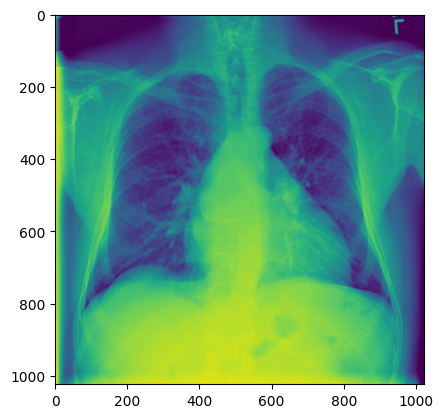

In [11]:
# Load the first image and verify it's existence, and check a label

if debug:
    image = Image.open(os.path.join(img_dir, "00000001_000.png"))
    print(annotations.iloc[0])
    print("This patient is aflicted with:", annotations["Finding Labels"])
    print(image)
    plt.imshow(image)

In [12]:
# labels = set([x for y in [x.split("|") for x in annotations["Finding Labels"]] for x in y])
# labels.remove("No Finding")
# labels = extract_unique_labels(annotations, "Finding Labels")

# if debug:
#    print(labels, "There are", len(labels), "labels available")

In [13]:
batch_size = 8
transform = transforms.Compose(
    [transforms.ConvertImageDtype(float32),
    transforms.Normalize((0.5,), (0.5,))])

train_dataset = ChestXRayDataset(train_annotation_file, img_dir, transform=transform, target_transform=to_numeric_label)
train_loader = DataLoader(train_dataset, batch_size)

test_dataset = ChestXRayDataset(test_annotation_file, img_dir, transform=transform, target_transform=to_numeric_label)
test_loader = DataLoader(test_dataset, batch_size)
if debug:
    print(train_dataset.target_labels)
    for idx, value in enumerate(train_loader):
        test_img, test_lab = value
        img = test_img[0]
        label = test_lab[0]
        print(label)
        if idx == 100:
            break

['Edema', 'Hernia', 'Atelectasis', 'Consolidation', 'Pneumonia', 'Infiltration', 'Nodule', 'Pleural_Thickening', 'Effusion', 'Cardiomegaly', 'Emphysema', 'Pneumothorax', 'Mass', 'Fibrosis']


libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.])
tensor([0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0

In [7]:
model = models.resnet101(weights=None)
model.fc = nn.Linear(2048, len(labels))

In [8]:
# Hyper params
lr = 10e-4

optimizer = optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()

def train_epoch(idx, data_loader):
    prev_loss = 0
    running_loss = 0
    
    for i, data in enumerate(data_loader):
        inputs, labels = data

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000
            print("batch {} loss: {}".format(i+1, last_loss))
            running_loss = 0.
    
    return last_loss

In [ ]:
epochs = 1
best_loss = 10_000_000.

for epoch in range(epochs):
    model.train(True)

    avg_loss = train_epoch(epoch, train_loader)

    running_validation_loss = 0
    model.eval()
    
    with torch.no_grad():
        for i, vdata in enumerate(validation_loader):
            validation_inputs, validation_labesl = vdata
            validation_output = model(validation_inputs)
            validation_loss = loss_fn(validation_outputs, validation_inputs)
            running_validation_loss += validation_loss
    avg_validation_loss = running_validation_loss/(i+1)

    if avg_validation_loss < best_loss:
        best_loss = avg_loss
        torch.save(model.state_dict(), "model_{}_{}".format(epoch, epoch))

libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG
